In [ ]:
import numpy as np
import pandas as pd

# Sección nueva

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",")

Saving heart_failure_clinical_records_dataset (1).csv to heart_failure_clinical_records_dataset (1).csv


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

In [ ]:
print(df.info())
print('Classes and number of values in the dataset',Counter(df['DEATH_EVENT']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
Classes and n

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = df.rename(columns={'DEATH_EVENT':'EventoCanonico'})
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'EventoCanonico'],
      dtype='object')

<Axes: xlabel='EventoCanonico', ylabel='count'>

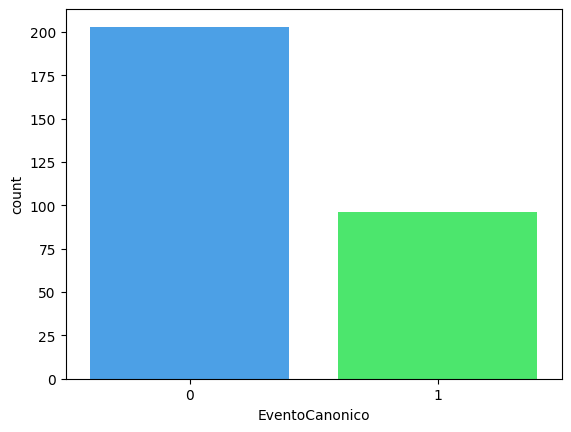

In [ ]:
cols= ["#33A2FF","#33FF5E"]
sns.countplot(x=df["EventoCanonico"], palette= cols)

In [ ]:
y = df["EventoCanonico"]
x = df[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]

x = pd.get_dummies(x)

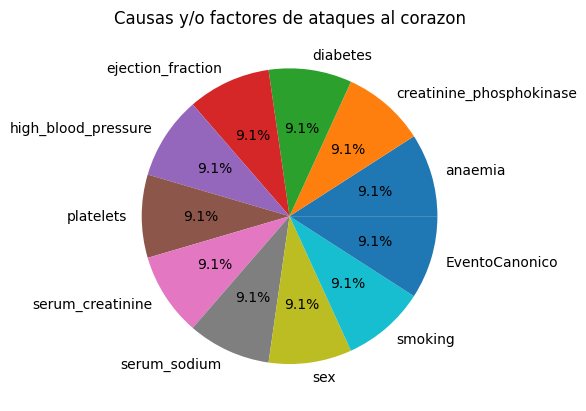

In [ ]:
dftorta = pd.DataFrame({'Index': ['anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking','EventoCanonico']})
values = dftorta['Index'].values
counts = np.unique(values, return_counts=True)[1]
plt.pie(counts, labels=values, autopct="%1.1f%%")
plt.title("Causas y/o factores de ataques al corazon")
plt.show()

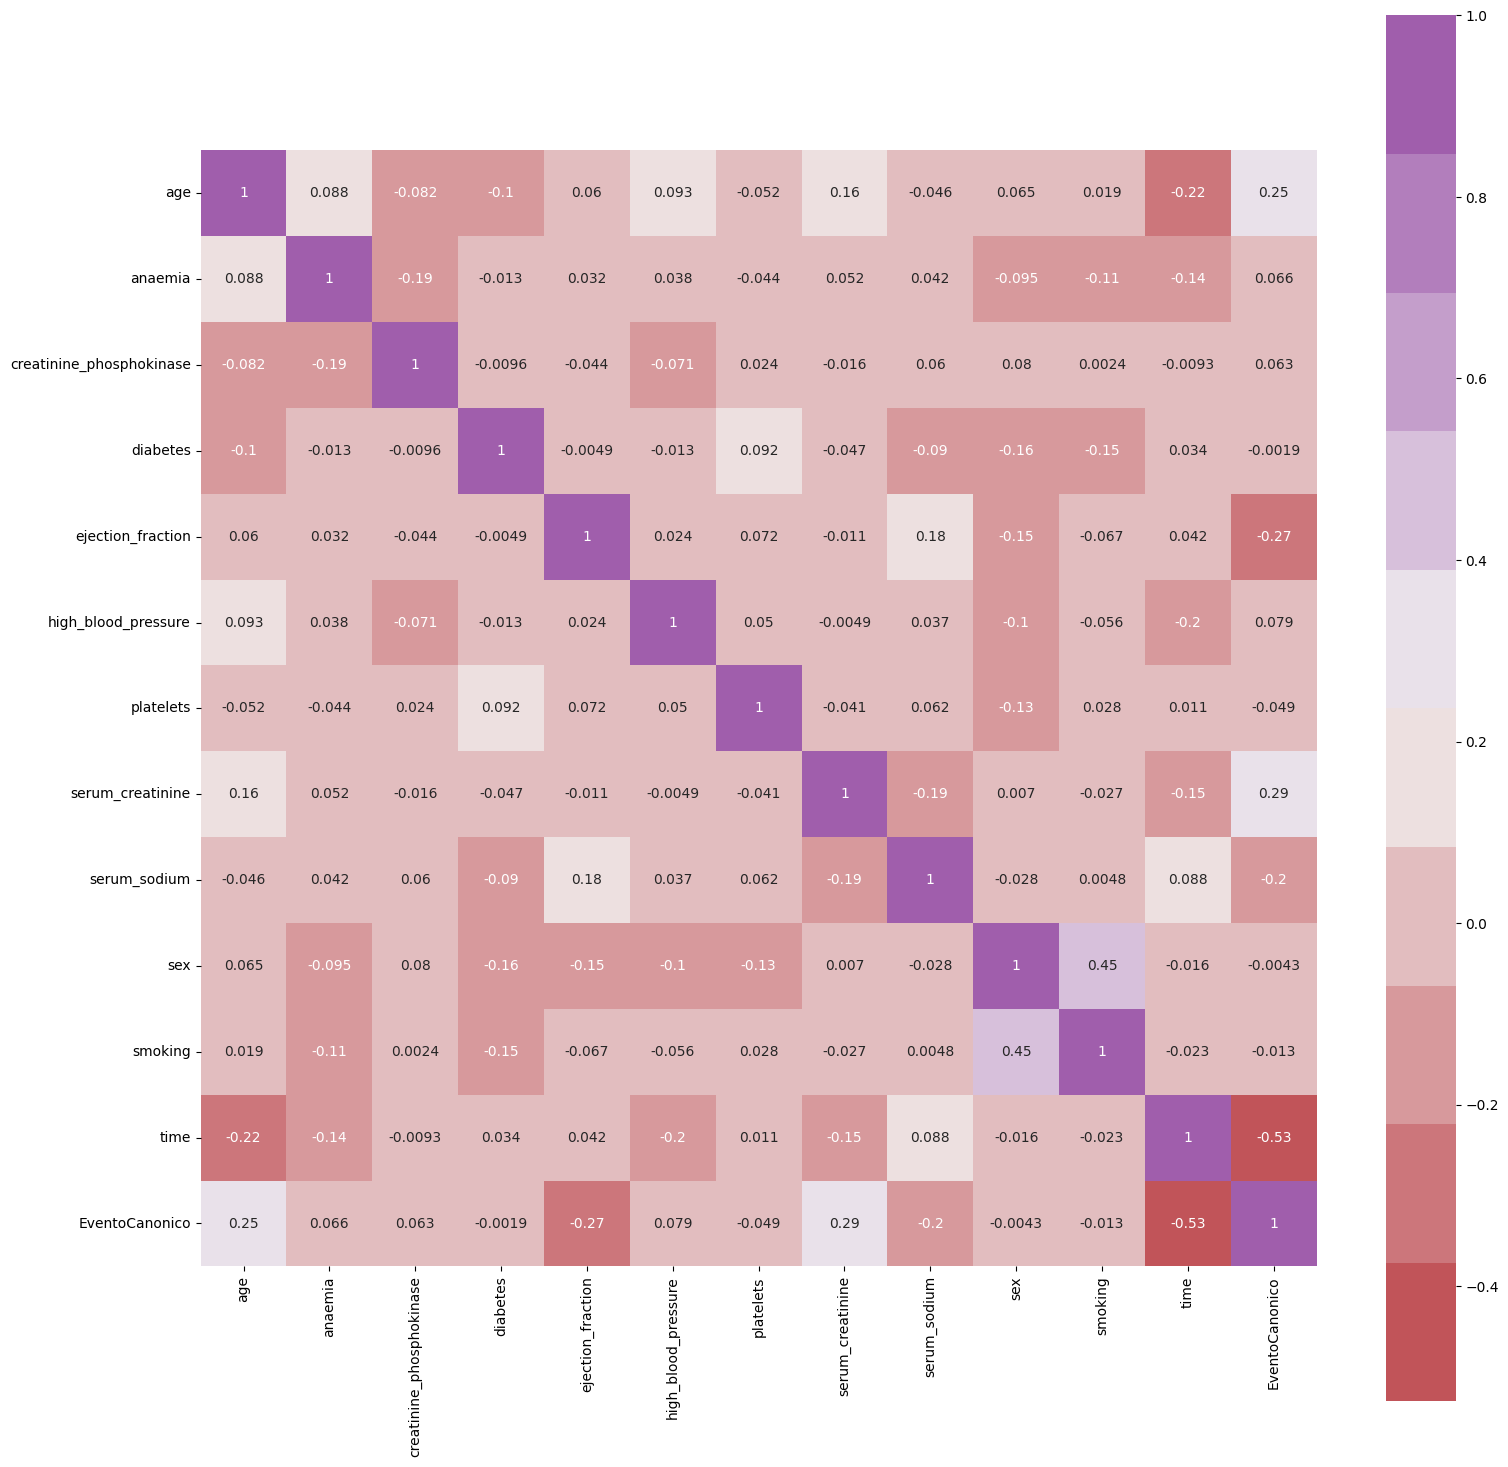

In [ ]:
cmap = sns.diverging_palette(10,300,  s=50, l=50, n=10)
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

Text(0.5, 1.0, 'Que tanto afecta la edad')

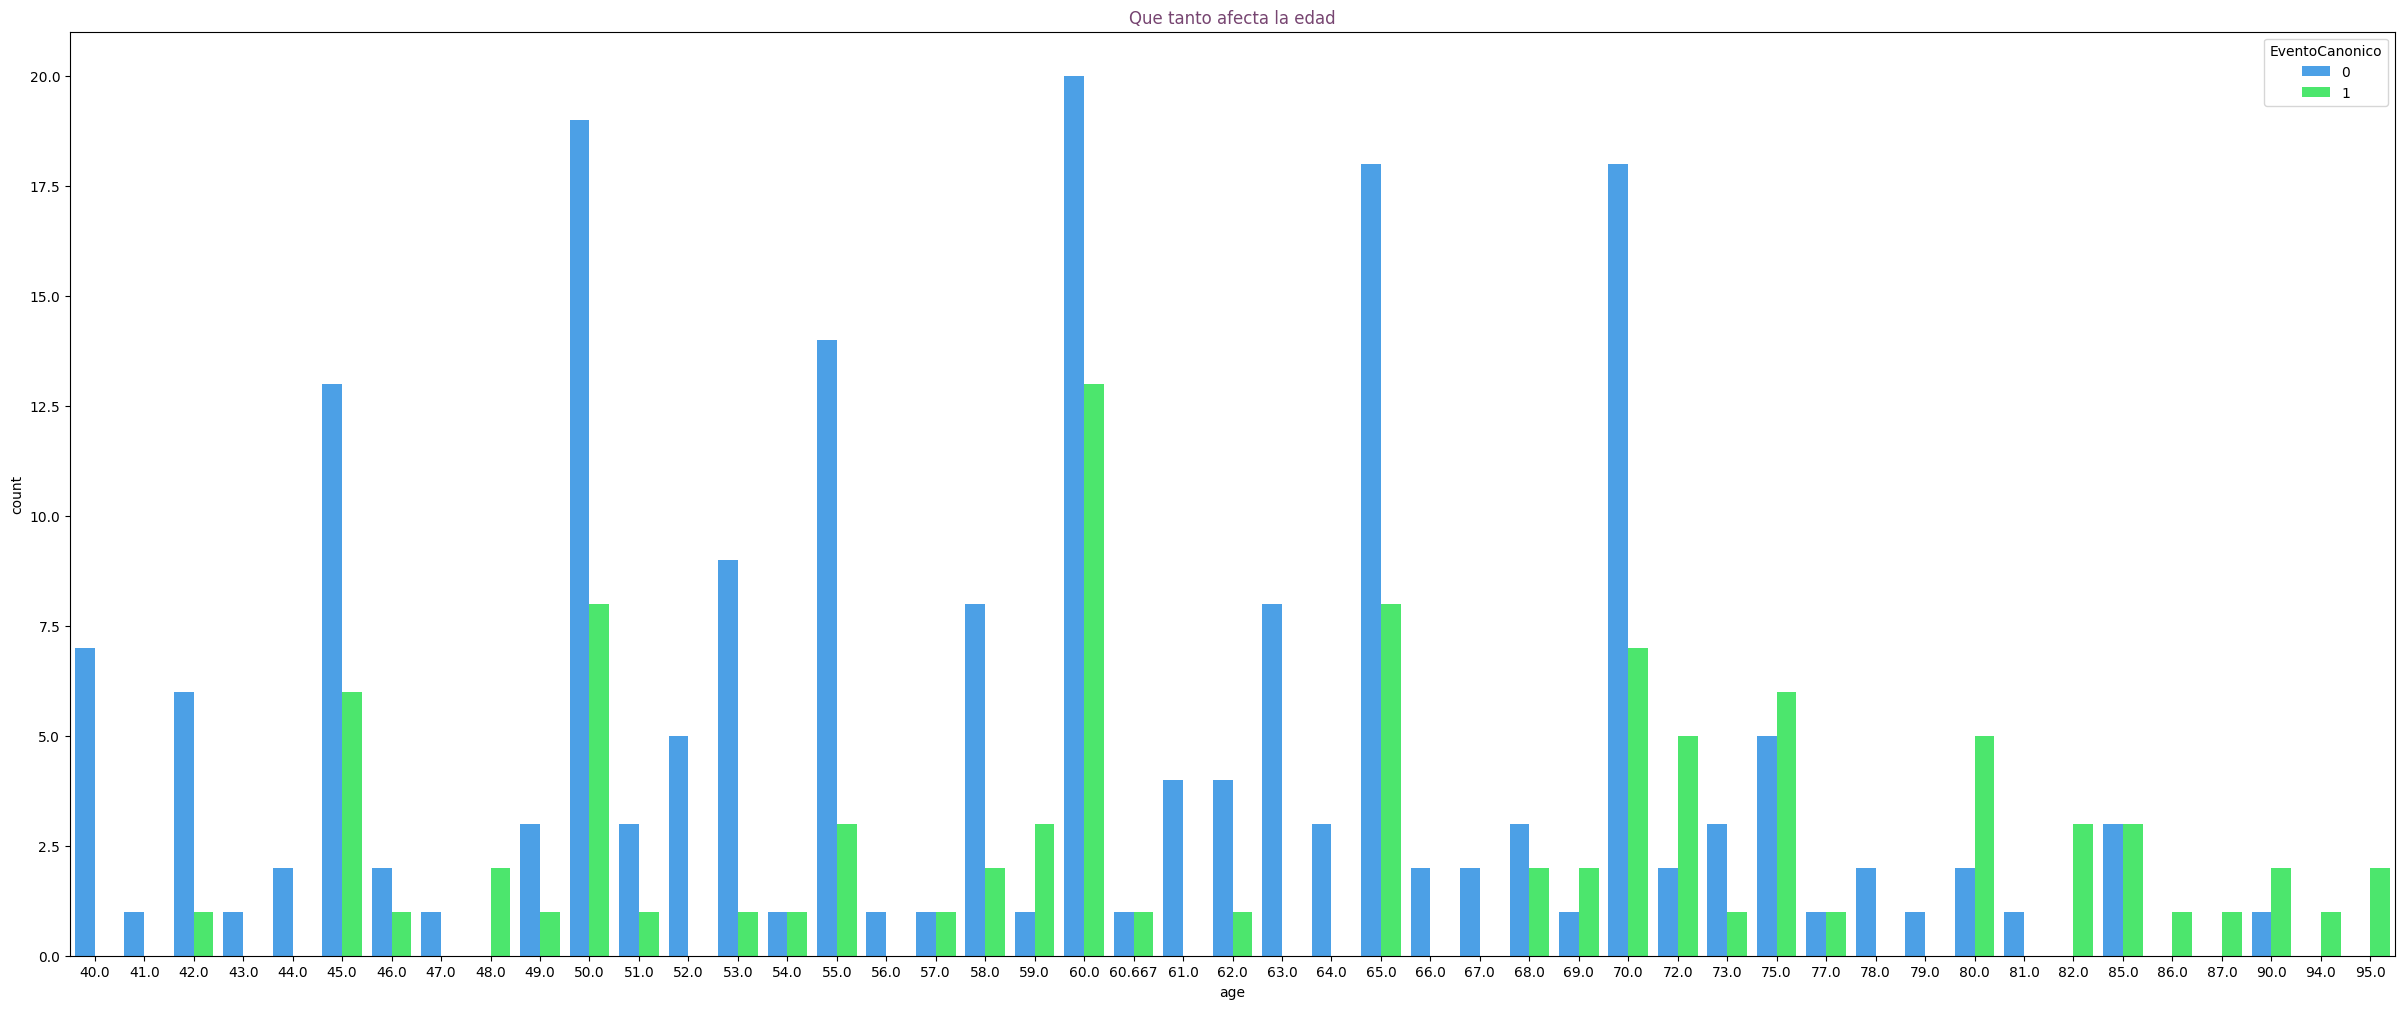

In [ ]:

plt.figure(figsize=(30,12))
Days_of_week=sns.countplot(x=df['age'],data=df, hue ="EventoCanonico",palette = cols)
Days_of_week.set_title("Que tanto afecta la edad", color="#774571", )


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

ct = ColumnTransformer([("numeric", StandardScaler(), ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'])])
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train.astype(str))
Y_test = le.transform(Y_test.astype(str))

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(12,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs = 100, batch_size = 16, verbose = 1)

loss, acc = model.evaluate(X_train, Y_train, verbose=0)
print("Loss", loss, "Accuracy:", acc)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 1.0536 - accuracy: 0.3349
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.9785 - accuracy: 0.3541
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.9194 - accuracy: 0.3589
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8698 - accuracy: 0.3732
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8215 - accuracy: 0.3923
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7813 - accuracy: 0.4450
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7424 - accuracy: 0.4785
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.5167
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5694
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6364
Epoch 11/

In [ ]:
y_estimate = model.predict(X_test,verbose=0)
y_estimate = np.argmax(y_estimate,axis = 1)
y_true = np.argmax(Y_test,axis=1)

print(classification_report(y_true, y_estimate))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        62
           1       0.84      0.57      0.68        28

    accuracy                           0.83        90
   macro avg       0.84      0.76      0.78        90
weighted avg       0.83      0.83      0.82        90



In [ ]:
from google.colab import files
import joblib

In [ ]:
joblib.dump(model, 'modelo.pkl')

['modelo.pkl']

In [ ]:
from google.colab import files

# Descargar el archivo "modelo.pkl"
files.download('modelo.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>